In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [2]:
raw_data = pd.read_csv('driver-data.csv')
raw_data

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
data = raw_data.drop(['id'],axis=1)

In [5]:
scale = StandardScaler()
scale_data = scale.fit_transform(data)

array([2, 2, 2, ..., 1, 1, 1])

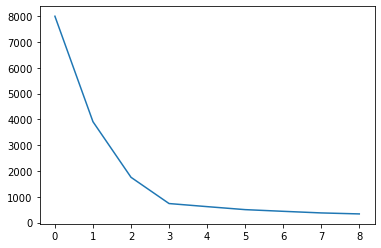

In [20]:
wcss = []
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scale_data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss)

kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(scale_data)

In [21]:
silhouette_score(scale_data, kmeans.fit_predict(scale_data))

0.7843727073779272

In [24]:
s_score = []
for i in range(2,10) :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scale_data)
    s_score.append(silhouette_score(scale_data, kmeans.predict(scale_data)))
s_score

[0.7075955632562002,
 0.7636008195603978,
 0.7843727073779272,
 0.7375646298817881,
 0.7338749612229495,
 0.42718105094381614,
 0.3597834075363985,
 0.35700173139718655]

In [27]:
s_score = []
for i in range(2,10) :
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(scale_data)
    s_score.append(silhouette_score(scale_data, agg.fit_predict(scale_data)))
s_score

#kmeans = AgglomerativeClustering(n_clusters=4)
#kmeans.fit_predict(scale_data)

[0.6422495198401666,
 0.7573076255215898,
 0.778897040913367,
 0.7762594607264451,
 0.7443058437156989,
 0.4097498904500179,
 0.34103659847510187,
 0.33906080564120666]

In [38]:
grid_params = {
    'eps':[0.01,0.1,1],
    'min_samples':[2,5,10,25],
}

grid_model = GridSearchCV(DBSCAN,grid_params,cv=5)
grid_model.fit(scale_data)
grid_model.best_params_
#s_score = []
#for i in [0.01,0.1,1] :
#    db = DBSCAN(eps=i)
#    s_score.append(silhouette_score(scale_data, db.fit_predict(scale_data)))
#s_score

#kmeans = AgglomerativeClustering(n_clusters=4)
#kmeans.fit_predict(scale_data)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <class 'sklearn.cluster._dbscan.DBSCAN'> does not.